# Neighborhood effects




In [28]:
using Plots
using EmpiricalBayes
using CSV
using DataFrames
using Distributions
using LaTeXStrings
using StatPlots
using JLD
using Nullables

In [6]:
gr()

Plots.GRBackend()

In [22]:
chetty = CSV.read("datasets/chetty_hendren2005.csv", types=Dict(3=>String));

In [33]:
idx = [!ismissing(x) for x in chetty[:p25_coef]]
β_hat = [chetty[i,:p25_coef] for i in find(idx)]
se_hat = [chetty[i,:p25_se] for i in find(idx)]
z_scores = β_hat./se_hat;

In [36]:
z_scores

595-element Array{Float64,1}:
 -1.664   
 -0.172691
  0.753521
 -0.300546
 -2.22613 
 -1.13801 
 -2.62879 
  0.414336
 -1.56792 
 -1.01304 
 -2.01    
 -2.58333 
  1.43095 
  ⋮       
  1.6729  
  0.894737
  0.276471
 -0.392593
 -0.741379
  0.979839
 -0.806604
  1.3678  
  0.736434
  0.932394
  1.70519 
  2.79268 

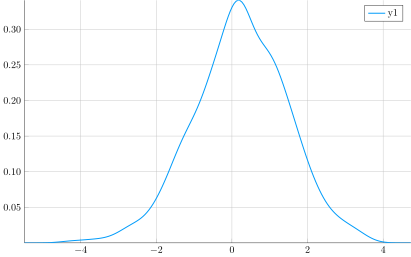

In [5]:
density(z_scores)

In [5]:
target = PosteriorTarget(LFSRNumerator(2.0))

EmpiricalBayes.PosteriorTarget(EmpiricalBayes.LFSRNumerator(2.0), EmpiricalBayes.MarginalDensityTarget(2.0))

In [38]:
marginal_grid = collect(linspace(-5,5,1001));
prior_grid = collect(linspace(-3,3,121));
marginal_h = marginal_grid[2]-marginal_grid[1];

In [39]:
ds = MixingNormalConvolutionProblem(Normal, 0.2, prior_grid, marginal_grid);

In [37]:
srand(34) #srand(200)
Xs = z_scores
n_total = length(Xs)
n_half = ceil(Int, n_total/2)
idx_test = sample(1:n_total, n_half, replace=false)
idx_train = setdiff(1:n_total, idx_test)
Xs_train = Xs[idx_train]
Xs_test = Xs[idx_test];

In [ ]:
post_mean_nb_cb = [CEB_ci_cb(Xs_train, Xs_test, ds, PosteriorTarget(PosteriorMeanNumerator(x)), 0.06) for x in xs];

In [10]:
extrema(Xs_train),extrema(Xs_test)

((-4.25, 3.3849607182940518), (-3.5225225225225225, 3.494769874476988))

In [12]:
post_mean_nb_cb = [CEB_ci_cb(Xs_train, Xs_test, ds, PosteriorTarget(PosteriorMeanNumerator(x)), 0.06) for x in xs];

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


In [13]:
left_ci_post_mean_nb_cb = [t[1].ci_left for t in post_mean_nb_cb]
right_ci_post_mean_nb_cb  =  [t[1].ci_right for t in post_mean_nb_cb]
point_est_post_mean_nb_cb  = [t[1].calibrated_target for t in post_mean_nb_cb];

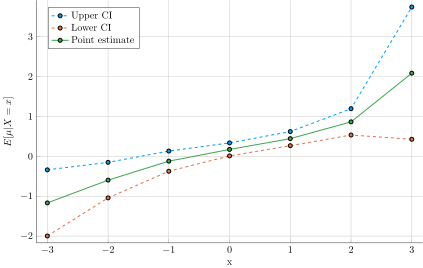

In [15]:
Plots.plot(xs, [right_ci_post_mean_nb_cb left_ci_post_mean_nb_cb point_est_post_mean_nb_cb],
     marker=([:hex :d]), label=["Upper CI" "Lower CI" "Point estimate"], 
     line=([:dash :dash :solid]), xlabel="x", ylabel=L"E[\mu | X=x]", legend=:topleft)

In [44]:
xs = Float64.(collect(-3:0.5:3));

In [45]:
lfsr_nb = [CEB_ci(Xs_train, Xs_test, ds, PosteriorTarget(LFSRNumerator(x))) for x in xs];

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

In [46]:
save("chetty_lfsr_nb_May23.jld", "lfsr_nb", lfsr_nb)

In [52]:
left_ci_lfsr_nb = clamp.([t[1].ci_left for t in lfsr_nb],0,1)
right_ci_lfsr_nb  =  clamp.([t[1].ci_right for t in lfsr_nb],0,1)
point_est_lfsr_nb  = clamp.([t[1].calibrated_target for t in lfsr_nb],0,1);

In [55]:
yuma_x = -0.216/0.172

-1.255813953488372

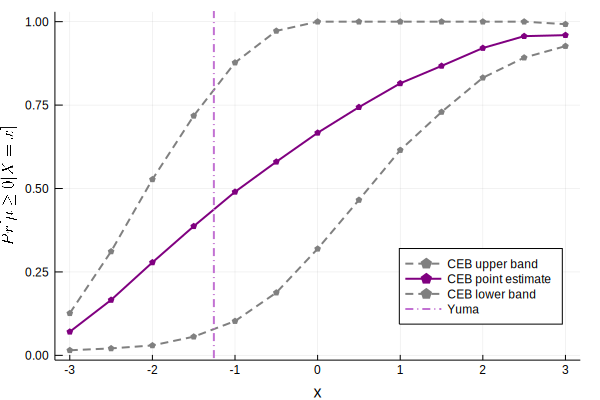

In [62]:
chetty_lfsr_bands = Plots.plot(xs, [right_ci_lfsr_nb  point_est_lfsr_nb  left_ci_lfsr_nb],
     label=["CEB upper band" "CEB point estimate" "CEB lower band"], 
     markershape=[:pentagon :pentagon :pentagon],
     markersize=3.5, markerstrokealpha=0, color=[:grey :purple :grey], linewidth=2,
     line=([:dash :solid :dash]), xlabel="x",ylabel=L"Pr[\mu \geq 0| X=x]",
     legend=:bottomright)
vline!([yuma_x], linewidth=2, label="Yuma", line=(:dashdot))

In [63]:
savefig(chetty_lfsr_bands, "chetty_lfsr_bands.pdf")

In [65]:
max_bias_contrib = [t[1].max_bias for t in lfsr_nb];
std_contrib = [t[1].std for t in lfsr_nb];


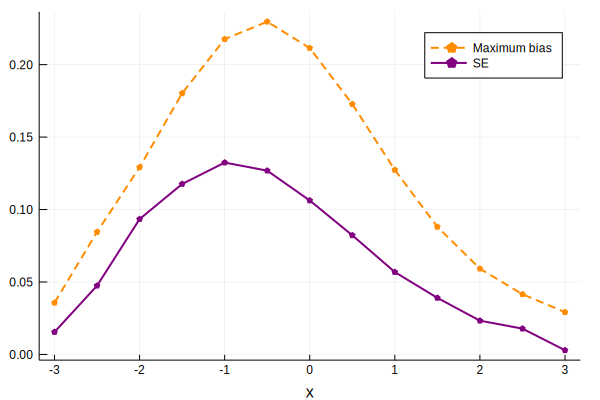

In [69]:
chetty_bias_var = Plots.plot(xs, [max_bias_contrib  std_contrib],
     label=["Maximum bias" "SE"], 
     markershape=[:pentagon :pentagon],
     markersize=3.5, markerstrokealpha=0, color=[:darkorange :purple], linewidth=2,
     line=([:dash :solid]), xlabel="x")

In [70]:
savefig(chetty_bias_var, "chetty_bias_var.pdf")

In [47]:
xs2 = Float64.(collect(-2.75:0.5:2.75));

In [48]:
lfsr_nb2 = [CEB_ci(Xs_train, Xs_test, ds, PosteriorTarget(LFSRNumerator(x))) for x in xs2];

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

In [51]:
length(lfsr_nb)

13

In [49]:
save("chetty_lfsr_nb_May23_2.jld", "lfsr_nb", lfsr_nb2)

In [8]:
lfsr_nb = load("chetty_lfsr_nb.jld")["lfsr_nb"];

In [7]:
lfsr_nb_Inf = [CEB_ci(Xs_train, Xs_test, ds, PosteriorTarget(LFSRNumerator(x)), C=Inf) for x in xs];

LoadError: [91mUndefVarError: xs not defined[39m

In [33]:
save("chetty_lfsr_nb_Inf.jld", "lfsr_nb_Inf", lfsr_nb_Inf)

In [11]:
lfsr_nb_Inf = load("chetty_lfsr_nb_Inf.jld")["lfsr_nb_Inf"];

In [16]:
left_ci_lfsr_nb = clamp.([t[1].ci_left for t in lfsr_nb],0,1)
right_ci_lfsr_nb  =  clamp.([t[1].ci_right for t in lfsr_nb],0,1)
point_est_lfsr_nb  = clamp.([t[1].calibrated_target for t in lfsr_nb],0,1);

left_ci_lfsr_nb_Inf = [t[1].ci_left for t in lfsr_nb_Inf]
right_ci_lfsr_nb_Inf  =  [t[1].ci_right for t in lfsr_nb_Inf]
point_est_lfsr_nb_Inf  = [t[1].calibrated_target for t in lfsr_nb_Inf];

In [19]:
[left_ci right_ci]

7-element Array{Float64,1}:
 0.146637
 0.44956 
 0.849662
 1.06928 
 1.11948 
 1.04998 
 0.996279

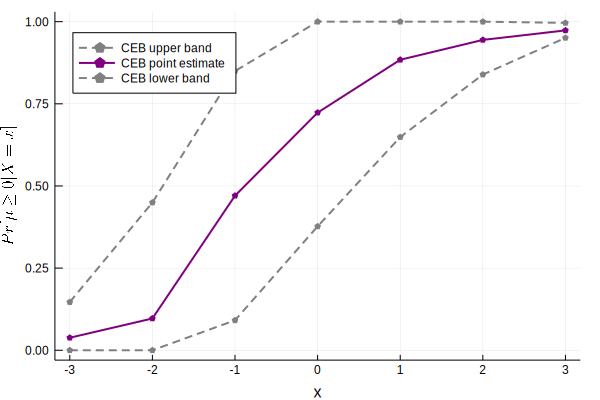

In [17]:
chetty_lfsr_bands = Plots.plot(xs, [right_ci_lfsr_nb  point_est_lfsr_nb  left_ci_lfsr_nb],
     label=["CEB upper band" "CEB point estimate" "CEB lower band"], 
     markershape=[:pentagon :pentagon :pentagon],
     markersize=3.5, markerstrokealpha=0, color=[:grey :purple :grey], linewidth=2,
     line=([:dash :solid :dash]), xlabel="x",ylabel=L"Pr[\mu \geq 0| X=x]",
     legend=:topleft)

In [19]:
savefig(chetty_lfsr_bands, "chetty_placeholder.pdf")

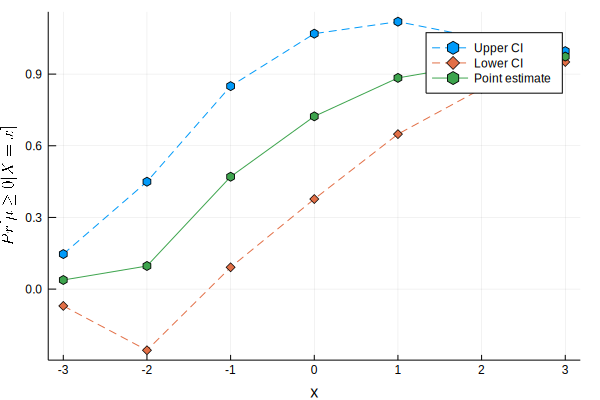

In [13]:
Plots.plot(xs, [right_ci_lfsr_nb left_ci_lfsr_nb point_est_lfsr_nb],
     marker=([:hex :d]), label=["Upper CI" "Lower CI" "Point estimate"], 
     line=([:dash :dash :solid]), xlabel="x", ylabel=L"Pr[\mu \geq 0 | X=x]")

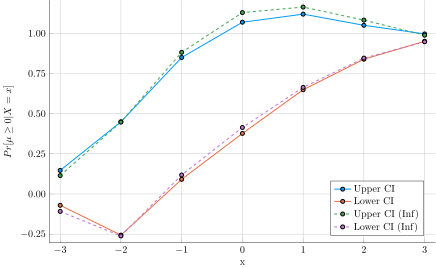

In [14]:
Plots.plot(xs, [right_ci_lfsr_nb left_ci_lfsr_nb right_ci_lfsr_nb_Inf left_ci_lfsr_nb_Inf],
     marker=([:hex :hex :d :d]), label=["Upper CI" "Lower CI" "Upper CI (Inf)" "Lower CI (Inf)"], 
     line=([:solid :solid :dash :dash]), xlabel="x", ylabel=L"Pr[\mu \geq 0 | X=x]",
     legend=:bottomright)

In [52]:
post_mean_nb = [CEB_ci(Xs_train, Xs_test, ds, PosteriorTarget(PosteriorMeanNumerator(x))) for x in xs];

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

In [63]:
post_mean_nb[1][4].C_bias, post_mean_nb[1][4].C_std

(0.005542953715146612, 0.022861777575374942)

In [54]:
        JLD.save("chetty_post_mean_nb_srand34.jld", "post_mean_nb", post_mean_nb)

In [29]:
        save("chetty_post_mean_nb.jld", "post_mean_nb", post_mean_nb)

In [64]:
post_mean_nb = load("chetty_post_mean_nb.jld")["post_mean_nb"];

In [65]:
left_ci_post_mean_nb = [t[1].ci_left for t in post_mean_nb]
right_ci_post_mean_nb = [t[1].ci_right for t in post_mean_nb]
point_est_post_mean_nb = [t[1].calibrated_target for t in post_mean_nb];

In [47]:
post_mean_nb_Inf = [CEB_ci(Xs_train, Xs_test, ds, PosteriorTarget(PosteriorMeanNumerator(x)); C=Inf) for x in xs];

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

In [51]:
JLD.save("chetty_post_mean_nb_Inf.jld", "post_mean_nb_Inf", post_mean_nb_Inf)

In [66]:
post_mean_nb_Inf = load("chetty_post_mean_nb_Inf.jld")["post_mean_nb_Inf"];

In [67]:
left_ci_post_mean_nb_Inf = [t[1].ci_left for t in post_mean_nb_Inf]
right_ci_post_mean_nb_Inf = [t[1].ci_right for t in post_mean_nb_Inf]
point_est_post_mean_nb_Inf = [t[1].calibrated_target for t in post_mean_nb_Inf];

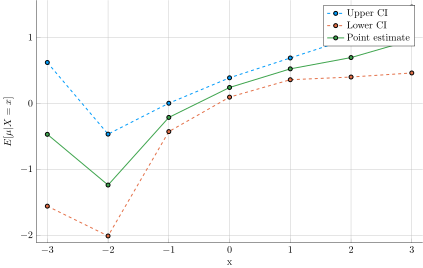

In [22]:
Plots.plot(xs, [right_ci_post_mean_nb left_ci_post_mean_nb point_est_post_mean_nb],
     marker=([:hex :d]), label=["Upper CI" "Lower CI" "Point estimate"], 
     line=([:dash :dash :solid ]), xlabel="x", ylabel=L"E[\mu | X=x]")

In [74]:
savefig("neighborhood_posterior_prob.pdf")

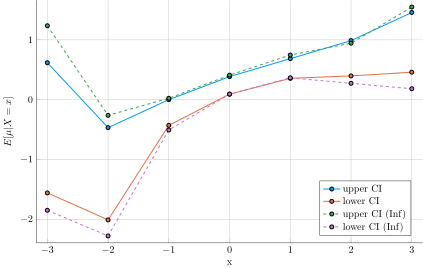

In [68]:
Plots.plot(xs, [right_ci_post_mean_nb left_ci_post_mean_nb right_ci_post_mean_nb_Inf left_ci_post_mean_nb_Inf],
     marker=([:hex :d]), label=["upper CI" "lower CI" "upper CI (Inf)" "lower CI (Inf)"], 
     line=([:solid :solid :dash :dash]), xlabel="x", ylabel=L"E[\mu | X=x]",
     legend=:bottomright)
#plot!(x_grid, ys, line=:dashdot, label="NPMLE")

In [69]:
savefig("neighborhood_posterior_mean_srand200.pdf")

In [28]:
prior_grid2 =  collect(linspace(-5,5,501))
mynpmle = StatsBase.fit(NPMLE, prior_grid, marginal_grid, Xs; σ=0.01)

LoadError: [91mUndefVarError: Xs not defined[39m

In [85]:
extrema(Xs)

(-4.25, 3.494769874476988)

In [86]:
sum(Xs .<= -3)

5

In [87]:
myres[end][1].est_num, myres[end][1].est_denom

(0.03134688865637991, 0.008772833745197772)

In [94]:
myres[end][1].max_bias, myres[end][1].std

(1.0464282286819249, 0.46844531968577485)

In [97]:
myres[end][3].max_bias, myres[end][3].sd

(0.0096576148690785, 0.02082530138240216)


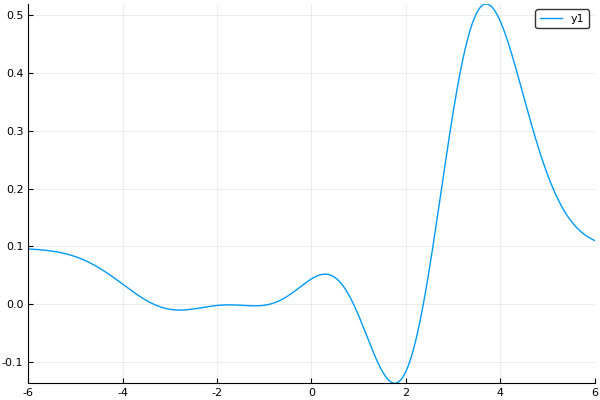

In [98]:
plot(marginal_grid, (myres[end][3].Q.Q .+ myres[end][3].Q.Qo))


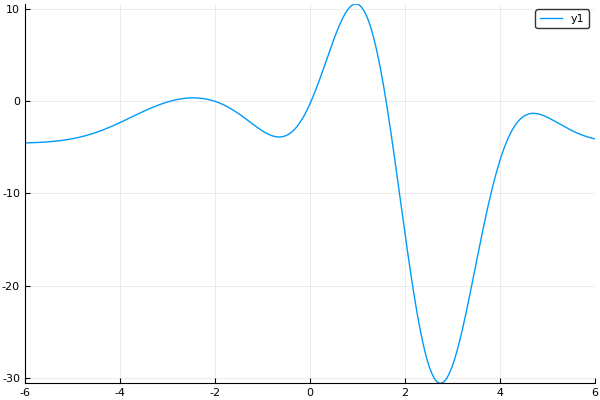

In [95]:
plot(marginal_grid, (myres[end][1].ma.Q.Q .+ myres[end][1].ma.Q.Qo)./myres[end][1].est_denom)

In [84]:
myres[end][1].calibrated_target, myres[end][1].est_target

(3.823583481948805, 3.5731771018160607)

In [34]:
npmle_prob = NormalConvolutionProblem(mynpmle, marginal_grid)


EmpiricalBayes.NormalConvolutionProblem(MixtureModel{Distributions.Normal}(K = 7)
components[1] (prior = 0.0334): Distributions.Normal{Float64}(μ=-3.0, σ=0.01)
components[2] (prior = 0.2353): Distributions.Normal{Float64}(μ=-0.35, σ=0.01)
components[3] (prior = 0.1556): Distributions.Normal{Float64}(μ=-0.3, σ=0.01)
components[4] (prior = 0.0418): Distributions.Normal{Float64}(μ=0.4, σ=0.01)
components[5] (prior = 0.3256): Distributions.Normal{Float64}(μ=0.45, σ=0.01)
components[6] (prior = 0.2052): Distributions.Normal{Float64}(μ=1.2, σ=0.01)
components[7] (prior = 0.0032): Distributions.Normal{Float64}(μ=1.25, σ=0.01)
, [1.56164e-10, 1.67552e-10, 1.79745e-10, 1.92797e-10, 2.06768e-10, 2.21718e-10, 2.37716e-10, 2.54831e-10, 2.73138e-10, 2.92719e-10  …  6.45499e-11, 6.00468e-11, 5.58497e-11, 5.19386e-11, 4.82944e-11, 4.48994e-11, 4.17371e-11, 3.87919e-11, 3.60493e-11, 3.34958e-11], [-6.0, -5.988, -5.976, -5.964, -5.952, -5.94, -5.928, -5.916, -5.904, -5.892  …  5.892, 5.904, 5.916, 5.92

In [42]:
mynpmle.prior_mixing

7-element Array{Float64,1}:
 0.033428  
 0.235257  
 0.155563  
 0.0417781 
 0.325631  
 0.205186  
 0.00315619

In [46]:
μs = mynpmle.prior_grid
πs = mynpmle.prior_mixing

7-element Array{Float64,1}:
 0.033428  
 0.235257  
 0.155563  
 0.0417781 
 0.325631  
 0.205186  
 0.00315619

In [43]:
post_exp(x) = sum( [pdf(Normal(), μs[i]-x)*μs[i]*πs[i] for i=1:7])/sum( [pdf(Normal(), μs[i]-x)*πs[i] for i=1:7])

post_exp (generic function with 1 method)

In [48]:
x_grid = collect(-4:0.1:4);
ys = post_exp.(x_grid);

In [39]:
posterior_stats(npmle_prob, PosteriorTarget(PosteriorMeanNumerator(5.0)) )

(0.0, 6.563649318512759e-5, 0.0)